In [ ]:
! pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import os
from patchify import patchify
import cv2
from keras.models import load_model
import random
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


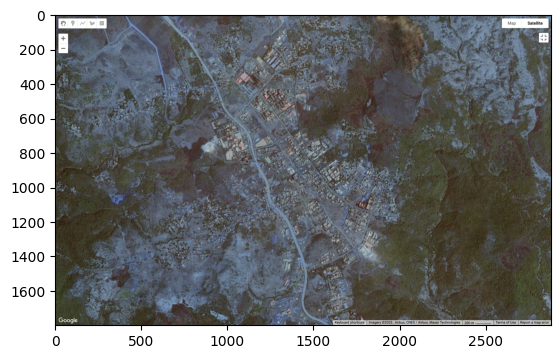

In [ ]:
img = cv2.imread("/content/drive/MyDrive/model_test/images/four.png")
plt.imshow(img)

In [ ]:
raww=[]
patch_size = 256
patches_image = patchify(img, (patch_size, patch_size, 3), step=patch_size)
for i in range(patches_image.shape[0]):
    for j in range(patches_image.shape[1]):
        patch_img = patches_image[i, j, :, :]
        patch_img=patch_img[0]
        raww.append(patch_img)


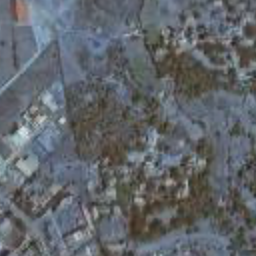

In [ ]:
Image.fromarray(raww[5])

<ipython-input-7-b0257a821cbf>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


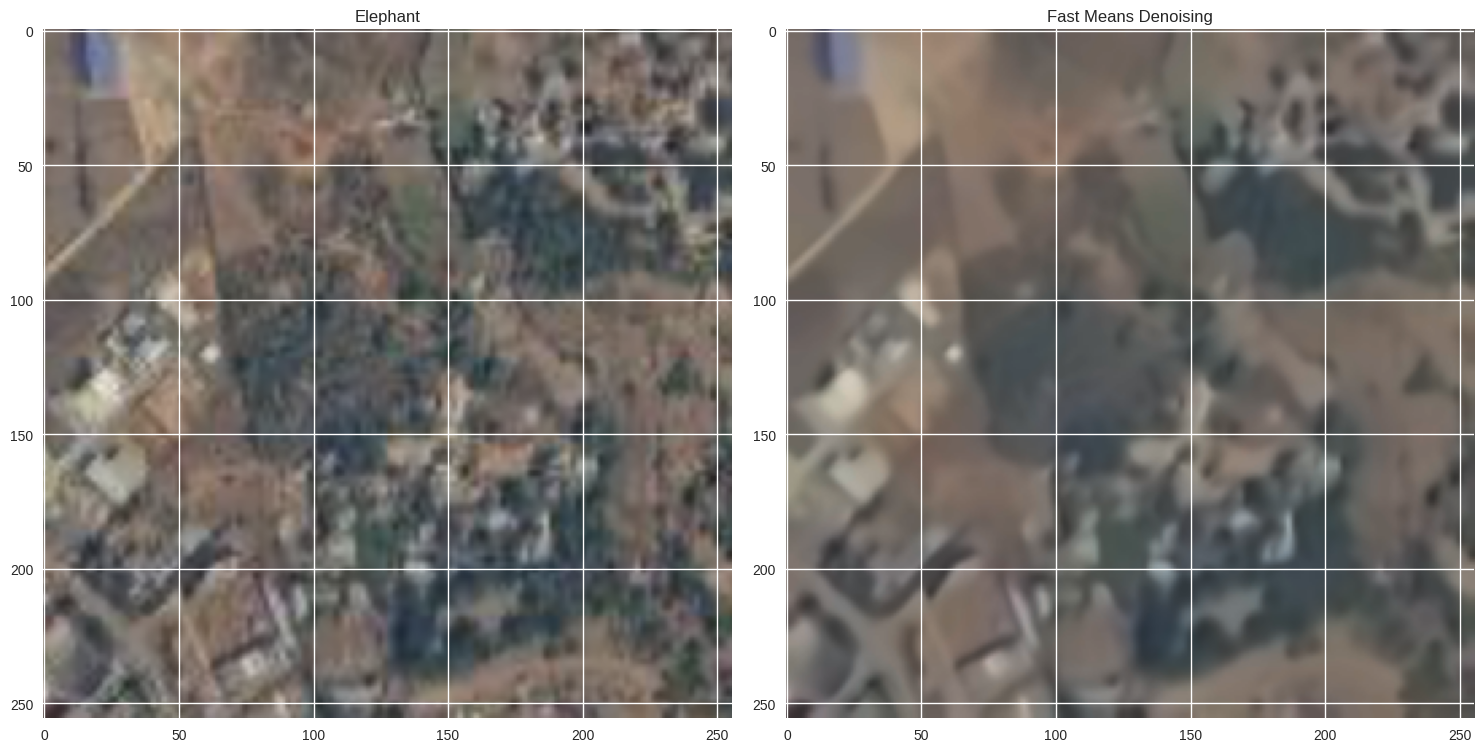

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
cv2.imwrite('/content/drive/MyDrive/model_test/denoised_images/image.png', raww[5])
image = cv2.imread('/content/drive/MyDrive/model_test/denoised_images/image.png')

dst = cv2.fastNlMeansDenoisingColored(image, None, 10, 6, 7, 20)

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Elephant')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.show()
raww[5]=dst

In [ ]:
raww=np.array(raww)
raww.shape
# Mean IOU
def jacard_coef(y_true, y_pred):
    y_true_f=K.flatten(y_true)
    y_pred_f=K.flatten(y_pred)
    intersection=K.sum(y_true_f*y_pred_f)
    return (intersection*1.0)/(K.sum(y_true_f)+K.sum(y_pred_f)-(intersection*1.0))

def jacard_loss(y_true, y_pred):
    return 1-jacard_coef(y_true, y_pred)

In [ ]:
model=load_model("/content/drive/MyDrive/Objectdet0/fyp/models/model_colab_28th_March.h5",custom_objects={
    'jacard_coef':jacard_coef,
    'jacard_loss':jacard_loss
})

In [ ]:
y_pred=model.predict(raww)
y_pred.shape

3/3 [==============================] - 52s 13s/step


(77, 256, 256, 1)

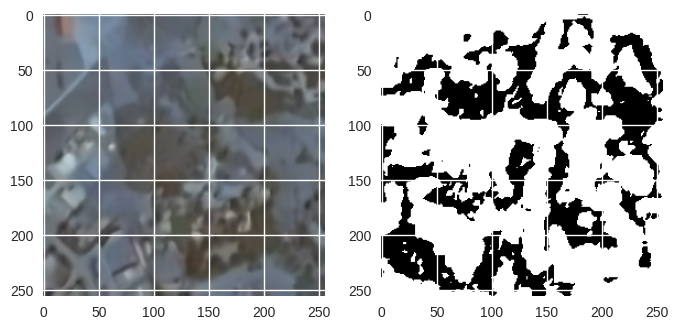

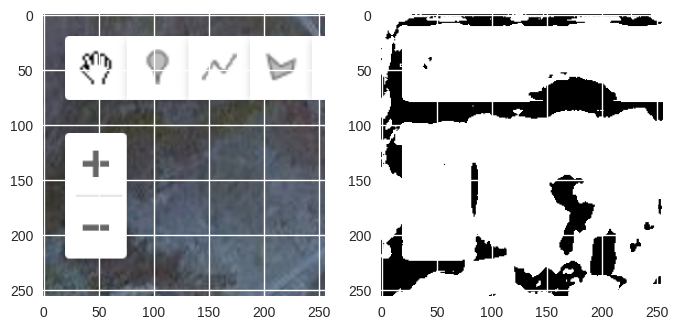

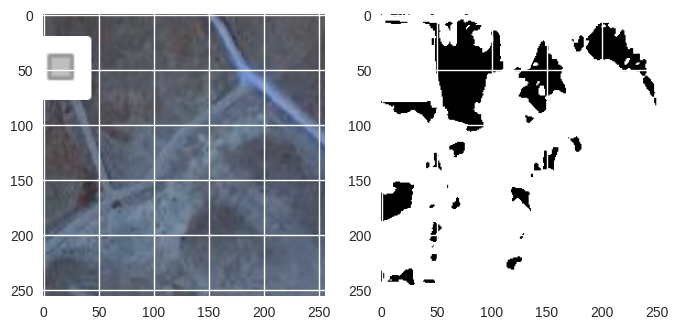

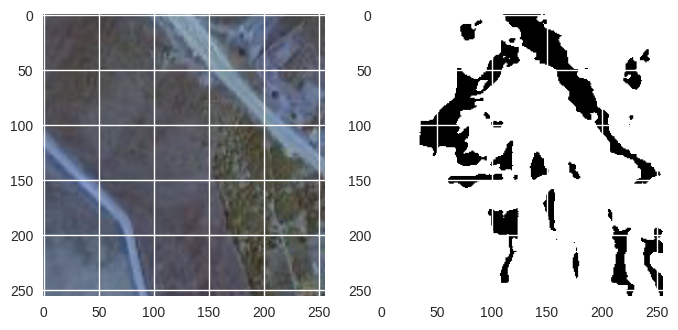

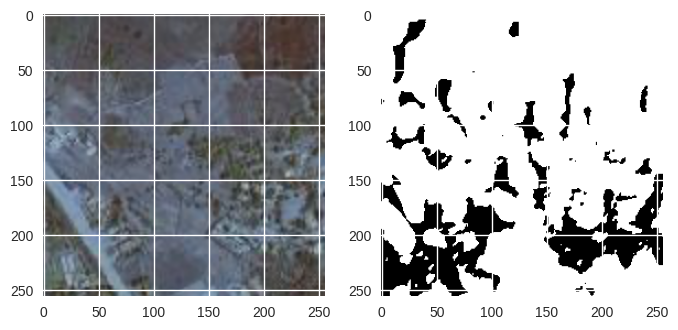

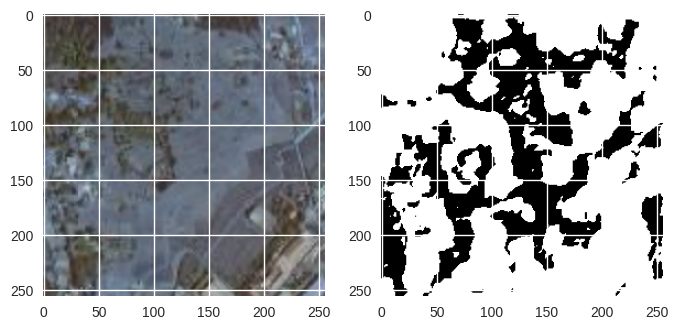

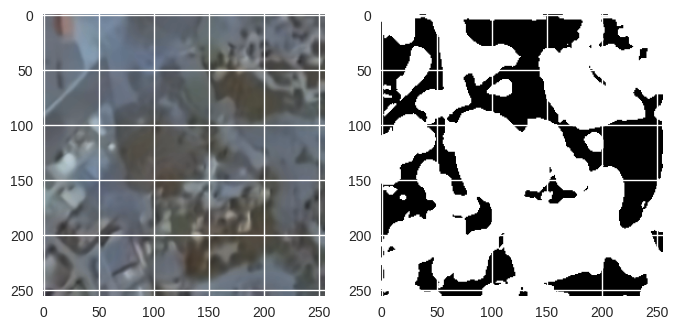

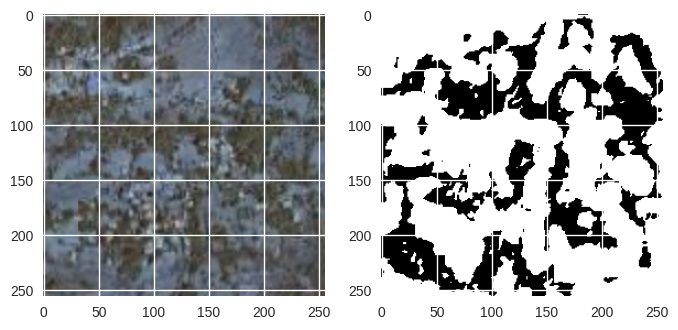

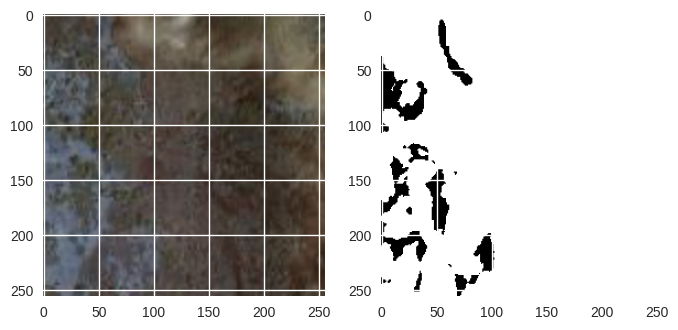

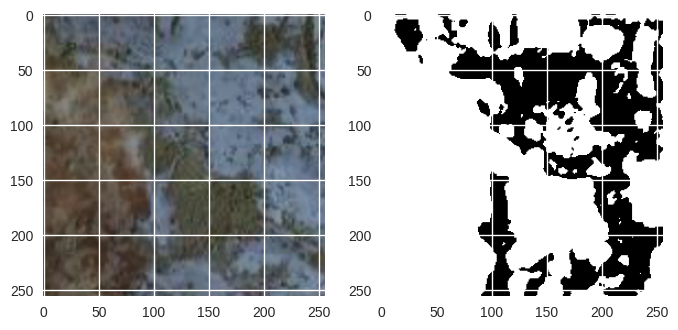

In [ ]:
y_pred_thresh=y_pred>0.5
img_num_start = random.randint(0, len(raww)//2)
img_num_end = random.randint(img_num_start, len(raww)-1)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(raww[5])
ax[1].imshow(y_pred_thresh[i], cmap="gray")
fig.show()
for i in range(img_num_start, img_num_end):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(raww[i])
    ax[1].imshow(y_pred_thresh[i], cmap="gray")
    np.save("/content/drive/MyDrive/model_test/detected/detect"+str(i)+".png",y_pred_thresh[i])
    x = np.load('/content/drive/MyDrive/model_test/detected/detect'+str(i)+'.png.npy')
    fig.show()
